In [ ]:
import os
import shutil
import random

# ================== Cấu hình ================== #
DATA_DIR = 'dataset2/traffic_data'  # Thư mục chứa ảnh gốc
OUTPUT_DIR = 'dataset2'              # Thư mục cha chứa train/val/test
TRAIN_RATIO = 0.7
VAL_RATIO = 0.15
TEST_RATIO = 0.15
SEED = 42

# ================== Hàm tạo thư mục ================== #
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

# Lấy danh sách lớp từ tên file ảnh (lấy 3 ký tự đầu và convert về int)
def get_class_from_filename(filename):
    # filename ví dụ: '000_1_0001_1_j.png'
    class_id_str = filename.split('_')[0]  # lấy phần '000'
    return str(int(class_id_str))  # chuyển về số và convert lại thành string (loại bỏ số 0 đầu)

# Lấy tất cả lớp có trong dataset (dựa trên tên file)
def get_all_classes(data_dir):
    classes = set()
    for filename in os.listdir(data_dir):
        if os.path.isfile(os.path.join(data_dir, filename)):
            class_id = get_class_from_filename(filename)
            classes.add(class_id)
    return sorted(classes, key=lambda x: int(x))

# ================== Tạo thư mục train/val/test cho từng lớp ================== #
all_classes = get_all_classes(DATA_DIR)
for folder in ['train', 'val', 'test']:
    for class_name in all_classes:
        create_dir(os.path.join(OUTPUT_DIR, folder, class_name))

# ================== Chia dữ liệu ================== #
random.seed(SEED)

for class_name in all_classes:
    # Lọc lấy các ảnh thuộc lớp này
    imgs = [f for f in os.listdir(DATA_DIR)
            if os.path.isfile(os.path.join(DATA_DIR, f)) and get_class_from_filename(f) == class_name]

    random.shuffle(imgs)

    total = len(imgs)
    train_end = int(total * TRAIN_RATIO)
    val_end = train_end + int(total * VAL_RATIO)

    train_imgs = imgs[:train_end]
    val_imgs = imgs[train_end:val_end]
    test_imgs = imgs[val_end:]

    # Copy ảnh vào thư mục tương ứng
    for img_name in train_imgs:
        shutil.copy2(os.path.join(DATA_DIR, img_name),
                     os.path.join(OUTPUT_DIR, 'train', class_name, img_name))

    for img_name in val_imgs:
        shutil.copy2(os.path.join(DATA_DIR, img_name),
                     os.path.join(OUTPUT_DIR, 'val', class_name, img_name))

    for img_name in test_imgs:
        shutil.copy2(os.path.join(DATA_DIR, img_name),
                     os.path.join(OUTPUT_DIR, 'test', class_name, img_name))

print("✅ Đã chia xong dữ liệu thành train/val/test.")


✅ Đã chia xong dữ liệu thành train/val/test.


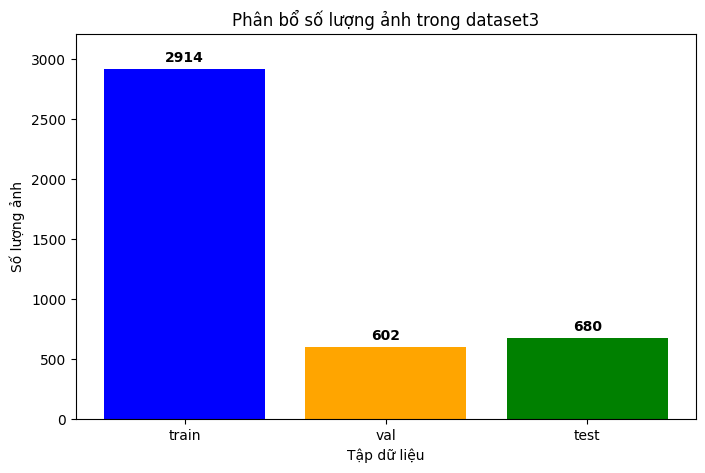

In [6]:
import os
import matplotlib.pyplot as plt

def count_images_in_dataset(base_dir):
    counts = {}
    for split in ['train', 'val', 'test']:
        split_dir = os.path.join(base_dir, split)
        total_images = 0
        
        if not os.path.exists(split_dir):
            print(f"Thư mục {split_dir} không tồn tại!")
            counts[split] = 0
            continue
        
        for class_name in os.listdir(split_dir):
            class_dir = os.path.join(split_dir, class_name)
            if os.path.isdir(class_dir):
                images = os.listdir(class_dir)
                num_images = len([f for f in images if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))])
                total_images += num_images
        
        counts[split] = total_images
    
    return counts

# Đếm số ảnh
dataset_path = 'dataset3'  # đổi thành đường dẫn dataset của bạn
counts = count_images_in_dataset(dataset_path)

# Vẽ biểu đồ
plt.figure(figsize=(8,5))
plt.bar(counts.keys(), counts.values(), color=['blue', 'orange', 'green'])
plt.title('Phân bổ số lượng ảnh trong dataset3')
plt.xlabel('Tập dữ liệu')
plt.ylabel('Số lượng ảnh')
plt.ylim(0, max(counts.values()) * 1.1)
for i, v in enumerate(counts.values()):
    plt.text(i, v + max(counts.values())*0.02, str(v), ha='center', fontweight='bold')
plt.show()


Found 2914 images belonging to 58 classes.
Found 602 images belonging to 58 classes.
Found 680 images belonging to 58 classes.


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 30, 30, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 30, 30, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 30, 30, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 15, 15, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 15, 15, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 15, 15, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 58)             │        14,906 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 310,650 (1.19 MB)

 Trainable params: 309,370 (1.18 MB)

 Non-trainable params: 1,280 (5.00 KB)

Epoch 1/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - accuracy: 0.1817 - loss: 3.8832 - mae: 0.0304 - mape: 15215563.0000 - mse: 0.0162 - rmse: 0.1272
Epoch 1: val_loss improved from inf to 4.11367, saving model to best_model3.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 36s 285ms/step - accuracy: 0.1825 - loss: 3.8767 - mae: 0.0304 - mape: 15205166.0000 - mse: 0.0162 - rmse: 0.1271 - val_accuracy: 0.1329 - val_loss: 4.1137 - val_mae: 0.0336 - val_mape: 16806032.0000 - val_mse: 0.0169 - val_rmse: 0.1299 - learning_rate: 0.0010
Epoch 2/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step - accuracy: 0.3291 - loss: 2.6871 - mae: 0.0264 - mape: 13216991.0000 - mse: 0.0142 - rmse: 0.1192
Epoch 2: val_loss did not improve from 4.11367
92/92 ━━━━━━━━━━━━━━━━━━━━ 29s 316ms/step - accuracy: 0.3294 - loss: 2.6853 - mae: 0.0264 - mape: 13211960.0000 - mse: 0.0142 - rmse: 0.1191 - val_accuracy: 0.0482 - val_loss: 5.1967 - val_mae: 0.0333 - val_mape: 16644642.0000 - val_mse: 0.0194 - val_rmse: 0.1392 - learning_rate: 0.0010
Epoch 3/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step - accuracy: 0.3971 - loss: 2.1579 - mae: 0.0240 - mape: 11986486.0000 - mse: 0.0127 - rmse: 0.1128
Epoch 3: val_loss did not improve from 4.11367
92/92 ━━━━━━━━━━━━━━━━━━━━

92/92 ━━━━━━━━━━━━━━━━━━━━ 28s 303ms/step - accuracy: 0.5462 - loss: 1.5684 - mae: 0.0199 - mape: 9961840.0000 - mse: 0.0100 - rmse: 0.1002 - val_accuracy: 0.2093 - val_loss: 3.5877 - val_mae: 0.0288 - val_mape: 14397855.0000 - val_mse: 0.0169 - val_rmse: 0.1290 - learning_rate: 5.0000e-04
Epoch 6/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - accuracy: 0.6073 - loss: 1.3184 - mae: 0.0182 - mape: 9091590.0000 - mse: 0.0088 - rmse: 0.0938
Epoch 6: val_loss improved from 3.58775 to 2.05914, saving model to best_model3.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 31s 330ms/step - accuracy: 0.6072 - loss: 1.3185 - mae: 0.0182 - mape: 9091879.0000 - mse: 0.0088 - rmse: 0.0939 - val_accuracy: 0.4286 - val_loss: 2.0591 - val_mae: 0.0227 - val_mape: 11369012.0000 - val_mse: 0.0125 - val_rmse: 0.1065 - learning_rate: 5.0000e-04
Epoch 7/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.6157 - loss: 1.2569 - mae: 0.0174 - mape: 8699200.0000 - mse: 0.0085 - rmse: 0.0920
Epoch 7: val_loss improved from 2.05914 to 1.39816, saving model to best_model3.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 29s 317ms/step - accuracy: 0.6160 - loss: 1.2562 - mae: 0.0174 - mape: 8695671.0000 - mse: 0.0085 - rmse: 0.0920 - val_accuracy: 0.5781 - val_loss: 1.3982 - val_mae: 0.0184 - val_mape: 9223729.0000 - val_mse: 0.0092 - val_rmse: 0.0901 - learning_rate: 5.0000e-04
Epoch 8/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step - accuracy: 0.6877 - loss: 1.0668 - mae: 0.0155 - mape: 7747456.0000 - mse: 0.0075 - rmse: 0.0862
Epoch 8: val_loss did not improve from 1.39816
92/92 ━━━━━━━━━━━━━━━━━━━━ 31s 340ms/step - accuracy: 0.6875 - loss: 1.0671 - mae: 0.0155 - mape: 7748826.5000 - mse: 0.0075 - rmse: 0.0862 - val_accuracy: 0.5581 - val_loss: 1.5861 - val_mae: 0.0183 - val_mape: 9153590.0000 - val_mse: 0.0099 - val_rmse: 0.0898 - learning_rate: 5.0000e-04
Epoch 9/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - accuracy: 0.6997 - loss: 1.0437 - mae: 0.0153 - mape: 7636315.0000 - mse: 0.0072 - rmse: 0.0857
Epoch 9: val_loss improved from 1.39816 to 0.83748, saving model to bes

92/92 ━━━━━━━━━━━━━━━━━━━━ 31s 330ms/step - accuracy: 0.6996 - loss: 1.0438 - mae: 0.0153 - mape: 7636007.0000 - mse: 0.0072 - rmse: 0.0857 - val_accuracy: 0.7276 - val_loss: 0.8375 - val_mae: 0.0133 - val_mape: 6667999.5000 - val_mse: 0.0061 - val_rmse: 0.0714 - learning_rate: 5.0000e-04
Epoch 10/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - accuracy: 0.6788 - loss: 1.0192 - mae: 0.0152 - mape: 7598016.5000 - mse: 0.0074 - rmse: 0.0860
Epoch 10: val_loss did not improve from 0.83748
92/92 ━━━━━━━━━━━━━━━━━━━━ 26s 284ms/step - accuracy: 0.6789 - loss: 1.0192 - mae: 0.0152 - mape: 7597186.5000 - mse: 0.0074 - rmse: 0.0860 - val_accuracy: 0.7259 - val_loss: 0.9082 - val_mae: 0.0130 - val_mape: 6499271.0000 - val_mse: 0.0062 - val_rmse: 0.0712 - learning_rate: 5.0000e-04
Epoch 11/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step - accuracy: 0.7384 - loss: 0.8886 - mae: 0.0135 - mape: 6772634.0000 - mse: 0.0063 - rmse: 0.0790
Epoch 11: val_loss did not improve from 0.83748
92/92 ━━━━━━━━━━━━━━

92/92 ━━━━━━━━━━━━━━━━━━━━ 32s 348ms/step - accuracy: 0.7429 - loss: 0.8495 - mae: 0.0132 - mape: 6611196.0000 - mse: 0.0061 - rmse: 0.0780 - val_accuracy: 0.7475 - val_loss: 0.7665 - val_mae: 0.0119 - val_mape: 5972945.0000 - val_mse: 0.0056 - val_rmse: 0.0673 - learning_rate: 5.0000e-04
Epoch 13/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step - accuracy: 0.7080 - loss: 1.0002 - mae: 0.0144 - mape: 7186763.0000 - mse: 0.0070 - rmse: 0.0850
Epoch 13: val_loss did not improve from 0.76654
92/92 ━━━━━━━━━━━━━━━━━━━━ 29s 308ms/step - accuracy: 0.7082 - loss: 0.9993 - mae: 0.0144 - mape: 7183259.5000 - mse: 0.0070 - rmse: 0.0849 - val_accuracy: 0.7292 - val_loss: 0.8728 - val_mae: 0.0124 - val_mape: 6183536.0000 - val_mse: 0.0063 - val_rmse: 0.0722 - learning_rate: 5.0000e-04
Epoch 14/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step - accuracy: 0.7671 - loss: 0.7718 - mae: 0.0121 - mape: 6047136.0000 - mse: 0.0055 - rmse: 0.0740
Epoch 14: val_loss did not improve from 0.76654
92/92 ━━━━━━━━━━━━━━

92/92 ━━━━━━━━━━━━━━━━━━━━ 28s 298ms/step - accuracy: 0.7904 - loss: 0.6737 - mae: 0.0111 - mape: 5529378.5000 - mse: 0.0050 - rmse: 0.0710 - val_accuracy: 0.8322 - val_loss: 0.6112 - val_mae: 0.0097 - val_mape: 4863511.5000 - val_mse: 0.0043 - val_rmse: 0.0572 - learning_rate: 5.0000e-04
Epoch 16/100
91/92 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step - accuracy: 0.7996 - loss: 0.6479 - mae: 0.0106 - mape: 5302591.5000 - mse: 0.0048 - rmse: 0.0692
Epoch 16: val_loss improved from 0.61116 to 0.47618, saving model to best_model3.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 25s 275ms/step - accuracy: 0.7996 - loss: 0.6478 - mae: 0.0106 - mape: 5301290.5000 - mse: 0.0048 - rmse: 0.0692 - val_accuracy: 0.8738 - val_loss: 0.4762 - val_mae: 0.0080 - val_mape: 3997480.5000 - val_mse: 0.0033 - val_rmse: 0.0495 - learning_rate: 5.0000e-04
Epoch 17/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step - accuracy: 0.8151 - loss: 0.6015 - mae: 0.0101 - mape: 5033360.0000 - mse: 0.0046 - rmse: 0.0675
Epoch 17: val_loss improved from 0.47618 to 0.43567, saving model to best_model3.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 29s 313ms/step - accuracy: 0.8150 - loss: 0.6015 - mae: 0.0101 - mape: 5032527.0000 - mse: 0.0046 - rmse: 0.0675 - val_accuracy: 0.8738 - val_loss: 0.4357 - val_mae: 0.0070 - val_mape: 3514528.7500 - val_mse: 0.0032 - val_rmse: 0.0486 - learning_rate: 5.0000e-04
Epoch 18/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step - accuracy: 0.8372 - loss: 0.5565 - mae: 0.0095 - mape: 4742635.5000 - mse: 0.0042 - rmse: 0.0655
Epoch 18: val_loss did not improve from 0.43567
92/92 ━━━━━━━━━━━━━━━━━━━━ 31s 337ms/step - accuracy: 0.8371 - loss: 0.5568 - mae: 0.0095 - mape: 4743578.0000 - mse: 0.0042 - rmse: 0.0655 - val_accuracy: 0.8223 - val_loss: 0.5987 - val_mae: 0.0086 - val_mape: 4292884.0000 - val_mse: 0.0044 - val_rmse: 0.0587 - learning_rate: 5.0000e-04
Epoch 19/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 0.8588 - loss: 0.4915 - mae: 0.0083 - mape: 4147758.7500 - mse: 0.0036 - rmse: 0.0593
Epoch 19: val_loss did not improve from 0.43567
92/92 ━━━━━━━━━━━━━━

92/92 ━━━━━━━━━━━━━━━━━━━━ 28s 302ms/step - accuracy: 0.8612 - loss: 0.4565 - mae: 0.0081 - mape: 4050890.0000 - mse: 0.0035 - rmse: 0.0587 - val_accuracy: 0.8837 - val_loss: 0.3908 - val_mae: 0.0058 - val_mape: 2886956.7500 - val_mse: 0.0028 - val_rmse: 0.0443 - learning_rate: 2.5000e-04
Epoch 22/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step - accuracy: 0.8844 - loss: 0.3834 - mae: 0.0070 - mape: 3517296.0000 - mse: 0.0029 - rmse: 0.0535
Epoch 22: val_loss improved from 0.39084 to 0.37704, saving model to best_model3.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 29s 314ms/step - accuracy: 0.8844 - loss: 0.3834 - mae: 0.0070 - mape: 3517363.0000 - mse: 0.0029 - rmse: 0.0535 - val_accuracy: 0.8821 - val_loss: 0.3770 - val_mae: 0.0059 - val_mape: 2935635.5000 - val_mse: 0.0027 - val_rmse: 0.0438 - learning_rate: 2.5000e-04
Epoch 23/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - accuracy: 0.8824 - loss: 0.4151 - mae: 0.0071 - mape: 3543111.0000 - mse: 0.0030 - rmse: 0.0555
Epoch 23: val_loss improved from 0.37704 to 0.27740, saving model to best_model3.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 29s 315ms/step - accuracy: 0.8825 - loss: 0.4148 - mae: 0.0071 - mape: 3542197.0000 - mse: 0.0030 - rmse: 0.0555 - val_accuracy: 0.9153 - val_loss: 0.2774 - val_mae: 0.0046 - val_mape: 2323652.5000 - val_mse: 0.0020 - val_rmse: 0.0377 - learning_rate: 2.5000e-04
Epoch 24/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step - accuracy: 0.9142 - loss: 0.3170 - mae: 0.0060 - mape: 2982030.0000 - mse: 0.0024 - rmse: 0.0480
Epoch 24: val_loss did not improve from 0.27740
92/92 ━━━━━━━━━━━━━━━━━━━━ 30s 328ms/step - accuracy: 0.9142 - loss: 0.3172 - mae: 0.0060 - mape: 2983102.0000 - mse: 0.0024 - rmse: 0.0480 - val_accuracy: 0.8904 - val_loss: 0.3352 - val_mae: 0.0055 - val_mape: 2726892.0000 - val_mse: 0.0024 - val_rmse: 0.0398 - learning_rate: 2.5000e-04
Epoch 25/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - accuracy: 0.9231 - loss: 0.2936 - mae: 0.0057 - mape: 2856793.2500 - mse: 0.0022 - rmse: 0.0459
Epoch 25: val_loss did not improve from 0.27740
92/92 ━━━━━━━━━━━━━━

92/92 ━━━━━━━━━━━━━━━━━━━━ 28s 304ms/step - accuracy: 0.9032 - loss: 0.3051 - mae: 0.0059 - mape: 2932364.2500 - mse: 0.0023 - rmse: 0.0492 - val_accuracy: 0.9402 - val_loss: 0.2278 - val_mae: 0.0037 - val_mape: 1840594.5000 - val_mse: 0.0015 - val_rmse: 0.0310 - learning_rate: 1.2500e-04
Epoch 28/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - accuracy: 0.9251 - loss: 0.2620 - mae: 0.0051 - mape: 2572038.7500 - mse: 0.0020 - rmse: 0.0444
Epoch 28: val_loss did not improve from 0.22784
92/92 ━━━━━━━━━━━━━━━━━━━━ 29s 316ms/step - accuracy: 0.9251 - loss: 0.2620 - mae: 0.0051 - mape: 2572241.0000 - mse: 0.0020 - rmse: 0.0443 - val_accuracy: 0.9336 - val_loss: 0.2428 - val_mae: 0.0037 - val_mape: 1847747.8750 - val_mse: 0.0017 - val_rmse: 0.0332 - learning_rate: 1.2500e-04
Epoch 29/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step - accuracy: 0.9340 - loss: 0.2341 - mae: 0.0047 - mape: 2346036.5000 - mse: 0.0017 - rmse: 0.0415
Epoch 29: val_loss did not improve from 0.22784
92/92 ━━━━━━━━━━━━━━

92/92 ━━━━━━━━━━━━━━━━━━━━ 28s 301ms/step - accuracy: 0.9323 - loss: 0.2593 - mae: 0.0050 - mape: 2503282.0000 - mse: 0.0019 - rmse: 0.0433 - val_accuracy: 0.9352 - val_loss: 0.2084 - val_mae: 0.0033 - val_mape: 1651743.0000 - val_mse: 0.0015 - val_rmse: 0.0310 - learning_rate: 1.2500e-04
Epoch 31/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step - accuracy: 0.9302 - loss: 0.2443 - mae: 0.0049 - mape: 2436954.5000 - mse: 0.0018 - rmse: 0.0422
Epoch 31: val_loss did not improve from 0.20836
92/92 ━━━━━━━━━━━━━━━━━━━━ 29s 319ms/step - accuracy: 0.9302 - loss: 0.2441 - mae: 0.0049 - mape: 2435342.2500 - mse: 0.0018 - rmse: 0.0422 - val_accuracy: 0.9385 - val_loss: 0.2152 - val_mae: 0.0033 - val_mape: 1638219.7500 - val_mse: 0.0015 - val_rmse: 0.0301 - learning_rate: 1.2500e-04
Epoch 32/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step - accuracy: 0.9356 - loss: 0.2192 - mae: 0.0044 - mape: 2187364.7500 - mse: 0.0017 - rmse: 0.0393
Epoch 32: val_loss improved from 0.20836 to 0.19942, saving model to

92/92 ━━━━━━━━━━━━━━━━━━━━ 26s 281ms/step - accuracy: 0.9356 - loss: 0.2193 - mae: 0.0044 - mape: 2187959.7500 - mse: 0.0017 - rmse: 0.0393 - val_accuracy: 0.9369 - val_loss: 0.1994 - val_mae: 0.0032 - val_mape: 1581843.3750 - val_mse: 0.0014 - val_rmse: 0.0302 - learning_rate: 1.2500e-04
Epoch 33/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step - accuracy: 0.9458 - loss: 0.2048 - mae: 0.0042 - mape: 2077851.2500 - mse: 0.0015 - rmse: 0.0370
Epoch 33: val_loss did not improve from 0.19942
92/92 ━━━━━━━━━━━━━━━━━━━━ 30s 322ms/step - accuracy: 0.9456 - loss: 0.2051 - mae: 0.0042 - mape: 2080084.6250 - mse: 0.0015 - rmse: 0.0371 - val_accuracy: 0.9352 - val_loss: 0.2100 - val_mae: 0.0034 - val_mape: 1694197.3750 - val_mse: 0.0015 - val_rmse: 0.0305 - learning_rate: 1.2500e-04
Epoch 34/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step - accuracy: 0.9451 - loss: 0.2049 - mae: 0.0042 - mape: 2075801.3750 - mse: 0.0015 - rmse: 0.0385
Epoch 34: val_loss improved from 0.19942 to 0.17698, saving model to

92/92 ━━━━━━━━━━━━━━━━━━━━ 31s 339ms/step - accuracy: 0.9450 - loss: 0.2049 - mae: 0.0042 - mape: 2076285.8750 - mse: 0.0015 - rmse: 0.0385 - val_accuracy: 0.9551 - val_loss: 0.1770 - val_mae: 0.0028 - val_mape: 1399006.8750 - val_mse: 0.0012 - val_rmse: 0.0272 - learning_rate: 1.2500e-04
Epoch 35/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - accuracy: 0.9324 - loss: 0.2384 - mae: 0.0046 - mape: 2289250.7500 - mse: 0.0018 - rmse: 0.0434
Epoch 35: val_loss did not improve from 0.17698
92/92 ━━━━━━━━━━━━━━━━━━━━ 30s 319ms/step - accuracy: 0.9324 - loss: 0.2384 - mae: 0.0046 - mape: 2289020.0000 - mse: 0.0018 - rmse: 0.0433 - val_accuracy: 0.9336 - val_loss: 0.2092 - val_mae: 0.0031 - val_mape: 1545463.2500 - val_mse: 0.0014 - val_rmse: 0.0280 - learning_rate: 1.2500e-04
Epoch 36/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - accuracy: 0.9433 - loss: 0.2088 - mae: 0.0043 - mape: 2147737.0000 - mse: 0.0016 - rmse: 0.0406
Epoch 36: val_loss did not improve from 0.17698
92/92 ━━━━━━━━━━━━━━

92/92 ━━━━━━━━━━━━━━━━━━━━ 27s 289ms/step - accuracy: 0.9389 - loss: 0.1873 - mae: 0.0039 - mape: 1970961.6250 - mse: 0.0015 - rmse: 0.0374 - val_accuracy: 0.9568 - val_loss: 0.1692 - val_mae: 0.0026 - val_mape: 1315881.2500 - val_mse: 0.0012 - val_rmse: 0.0266 - learning_rate: 6.2500e-05
Epoch 41/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.9490 - loss: 0.1959 - mae: 0.0040 - mape: 1987031.3750 - mse: 0.0015 - rmse: 0.0379
Epoch 41: val_loss did not improve from 0.16916
92/92 ━━━━━━━━━━━━━━━━━━━━ 29s 317ms/step - accuracy: 0.9489 - loss: 0.1961 - mae: 0.0040 - mape: 1987867.6250 - mse: 0.0015 - rmse: 0.0379 - val_accuracy: 0.9551 - val_loss: 0.1702 - val_mae: 0.0026 - val_mape: 1287952.7500 - val_mse: 0.0012 - val_rmse: 0.0248 - learning_rate: 6.2500e-05
Epoch 42/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step - accuracy: 0.9550 - loss: 0.1727 - mae: 0.0037 - mape: 1832803.1250 - mse: 0.0013 - rmse: 0.0348
Epoch 42: val_loss did not improve from 0.16916
92/92 ━━━━━━━━━━━━━━

92/92 ━━━━━━━━━━━━━━━━━━━━ 30s 325ms/step - accuracy: 0.9467 - loss: 0.1829 - mae: 0.0039 - mape: 1962694.6250 - mse: 0.0014 - rmse: 0.0365 - val_accuracy: 0.9518 - val_loss: 0.1633 - val_mae: 0.0024 - val_mape: 1219710.8750 - val_mse: 0.0011 - val_rmse: 0.0245 - learning_rate: 3.1250e-05
Epoch 45/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step - accuracy: 0.9541 - loss: 0.1764 - mae: 0.0037 - mape: 1844011.6250 - mse: 0.0013 - rmse: 0.0348
Epoch 45: val_loss did not improve from 0.16329
92/92 ━━━━━━━━━━━━━━━━━━━━ 26s 283ms/step - accuracy: 0.9541 - loss: 0.1765 - mae: 0.0037 - mape: 1844781.8750 - mse: 0.0013 - rmse: 0.0349 - val_accuracy: 0.9419 - val_loss: 0.1714 - val_mae: 0.0026 - val_mape: 1275228.2500 - val_mse: 0.0012 - val_rmse: 0.0255 - learning_rate: 3.1250e-05
Epoch 46/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step - accuracy: 0.9532 - loss: 0.1806 - mae: 0.0037 - mape: 1856073.7500 - mse: 0.0014 - rmse: 0.0357
Epoch 46: val_loss improved from 0.16329 to 0.15794, saving model to

92/92 ━━━━━━━━━━━━━━━━━━━━ 28s 302ms/step - accuracy: 0.9533 - loss: 0.1805 - mae: 0.0037 - mape: 1855405.2500 - mse: 0.0014 - rmse: 0.0357 - val_accuracy: 0.9518 - val_loss: 0.1579 - val_mae: 0.0024 - val_mape: 1186132.2500 - val_mse: 0.0011 - val_rmse: 0.0241 - learning_rate: 3.1250e-05
Epoch 47/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - accuracy: 0.9530 - loss: 0.1658 - mae: 0.0035 - mape: 1753380.0000 - mse: 0.0013 - rmse: 0.0351
Epoch 47: val_loss improved from 0.15794 to 0.15402, saving model to best_model3.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 30s 327ms/step - accuracy: 0.9530 - loss: 0.1658 - mae: 0.0035 - mape: 1753394.6250 - mse: 0.0013 - rmse: 0.0351 - val_accuracy: 0.9551 - val_loss: 0.1540 - val_mae: 0.0023 - val_mape: 1170368.8750 - val_mse: 0.0011 - val_rmse: 0.0237 - learning_rate: 3.1250e-05
Epoch 48/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step - accuracy: 0.9495 - loss: 0.1611 - mae: 0.0034 - mape: 1713584.3750 - mse: 0.0012 - rmse: 0.0343
Epoch 48: val_loss did not improve from 0.15402
92/92 ━━━━━━━━━━━━━━━━━━━━ 26s 285ms/step - accuracy: 0.9496 - loss: 0.1611 - mae: 0.0034 - mape: 1714107.1250 - mse: 0.0012 - rmse: 0.0343 - val_accuracy: 0.9568 - val_loss: 0.1615 - val_mae: 0.0024 - val_mape: 1216203.2500 - val_mse: 0.0011 - val_rmse: 0.0244 - learning_rate: 3.1250e-05
Epoch 49/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step - accuracy: 0.9507 - loss: 0.1690 - mae: 0.0035 - mape: 1748491.3750 - mse: 0.0013 - rmse: 0.0346
Epoch 49: val_loss did not improve from 0.15402
92/92 ━━━━━━━━━━━━━━

92/92 ━━━━━━━━━━━━━━━━━━━━ 30s 325ms/step - accuracy: 0.9465 - loss: 0.1726 - mae: 0.0037 - mape: 1839348.3750 - mse: 0.0013 - rmse: 0.0354 - val_accuracy: 0.9635 - val_loss: 0.1476 - val_mae: 0.0023 - val_mape: 1129990.3750 - val_mse: 9.6071e-04 - val_rmse: 0.0227 - learning_rate: 3.1250e-05
Epoch 51/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step - accuracy: 0.9536 - loss: 0.1613 - mae: 0.0035 - mape: 1731763.3750 - mse: 0.0013 - rmse: 0.0342
Epoch 51: val_loss did not improve from 0.14756
92/92 ━━━━━━━━━━━━━━━━━━━━ 31s 338ms/step - accuracy: 0.9536 - loss: 0.1613 - mae: 0.0035 - mape: 1731244.3750 - mse: 0.0013 - rmse: 0.0342 - val_accuracy: 0.9585 - val_loss: 0.1594 - val_mae: 0.0024 - val_mape: 1205065.6250 - val_mse: 0.0011 - val_rmse: 0.0241 - learning_rate: 3.1250e-05
Epoch 52/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.9515 - loss: 0.1749 - mae: 0.0035 - mape: 1759040.8750 - mse: 0.0013 - rmse: 0.0353
Epoch 52: val_loss did not improve from 0.14756
92/92 ━━━━━━━━━━

22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 196ms/step


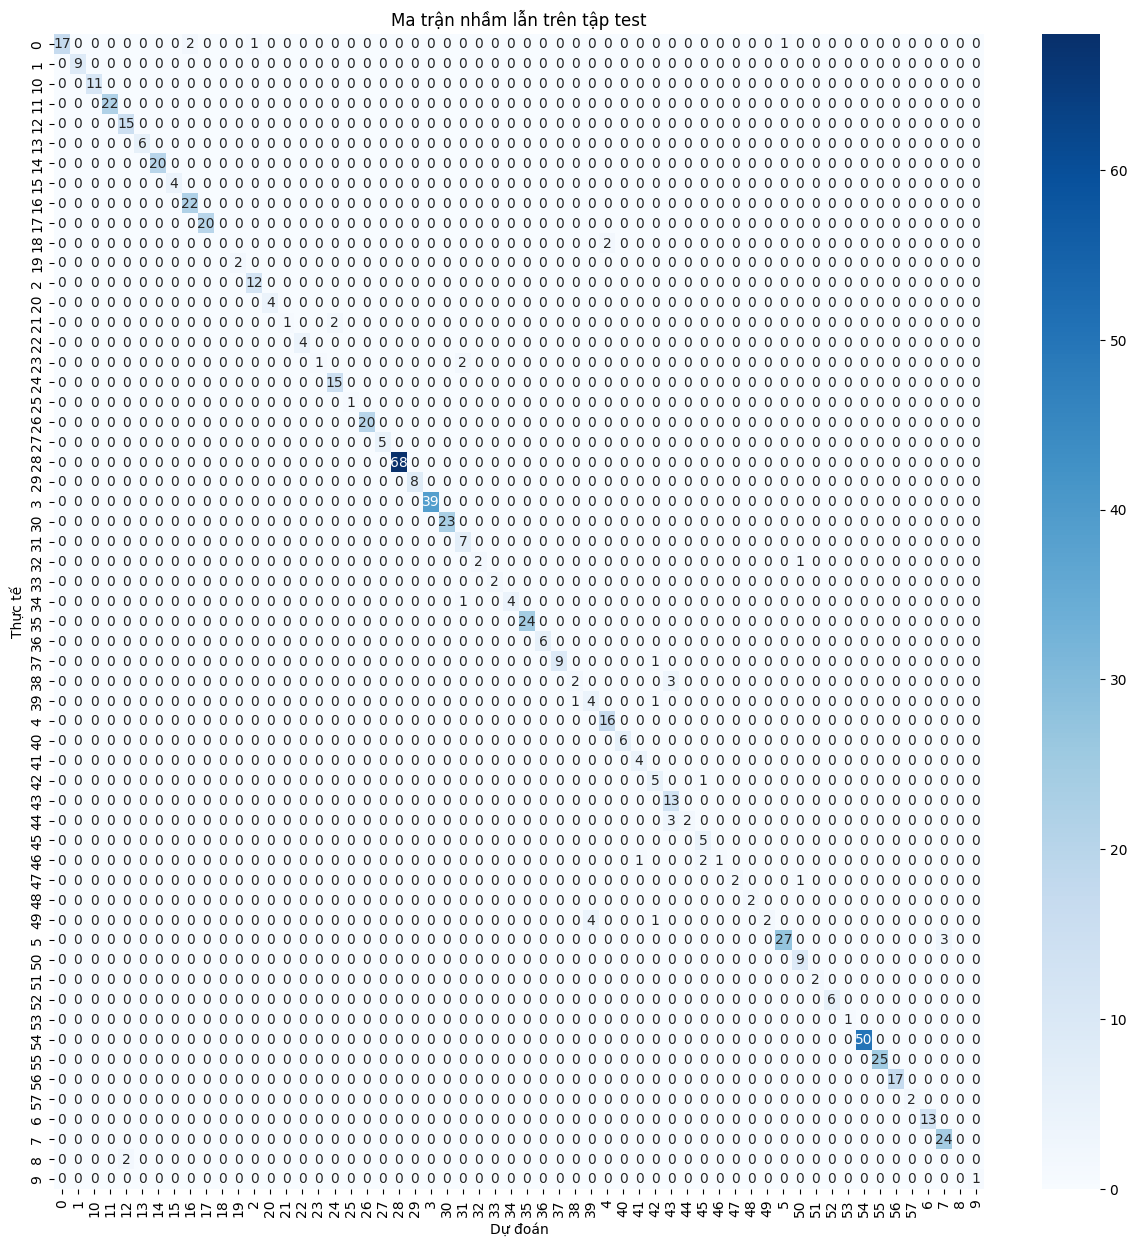

              precision    recall  f1-score   support

           0       1.00      0.81      0.89        21
           1       1.00      1.00      1.00         9
          10       1.00      1.00      1.00        11
          11       1.00      1.00      1.00        22
          12       0.88      1.00      0.94        15
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00         4
          16       0.92      1.00      0.96        22
          17       1.00      1.00      1.00        20
          18       0.00      0.00      0.00         2
          19       1.00      1.00      1.00         2
           2       0.92      1.00      0.96        12
          20       1.00      1.00      1.00         4
          21       1.00      0.33      0.50         3
          22       1.00      1.00      1.00         4
          23       1.00      0.33      0.50         3
          24       0.88    

c:\Users\T\Desktop\Al_Project\Traffic-Sign-Detection-Using-CNN\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\T\Desktop\Al_Project\Traffic-Sign-Detection-Using-CNN\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\T\Desktop\Al_Project\Traffic-Sign-Detection-Using-CNN\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, BatchNormalization, GlobalAveragePooling2D, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K
from sklearn.metrics import confusion_matrix, classification_report

# ===================== Cấu hình dữ liệu ===================== #
image_size = (30, 30)
batch_size = 32
num_classes = 58

train_dir = 'dataset3/train'
val_dir = 'dataset3/val'
test_dir = 'dataset3/test'

# ===================== Tạo ImageDataGenerator ===================== #
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=False,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# ===================== Định nghĩa custom metric RMSE (tùy chọn) =====================
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

# ===================== Xây dựng model =====================
model = Sequential([
    Conv2D(64, (3, 3), padding='same', activation='elu', input_shape=(image_size[0], image_size[1], 3)),
    BatchNormalization(),
    Dropout(0.1),

    Conv2D(64, (3, 3), padding='same', activation='elu'),
    BatchNormalization(),
    MaxPool2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), padding='same', activation='elu'),
    BatchNormalization(),
    Dropout(0.1),

    Conv2D(128, (3, 3), padding='same', activation='elu'),
    BatchNormalization(),
    MaxPool2D((2, 2)),
    Dropout(0.25),

    GlobalAveragePooling2D(),

    Dense(256, activation='elu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(num_classes, activation='softmax')
])

model.summary()

# ===================== Compile model =====================
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy', 'mae', 'mse', 'mape', rmse]
)

# ===================== Callbacks =====================
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
model_checkpoint = ModelCheckpoint('best_model3.h5', monitor='val_loss', save_best_only=True, verbose=1)

# ===================== Train model =====================
epochs = 100

steps_per_epoch = math.ceil(train_generator.samples / batch_size)
validation_steps = math.ceil(val_generator.samples / batch_size)

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_generator,
    validation_steps=validation_steps,
    epochs=epochs,
    callbacks=[early_stopping, reduce_lr, model_checkpoint]
)

# ===================== Đánh giá model và tạo ma trận nhầm lẫn =====================

# Lưu mô hình cuối cùng
model.save('model3.h5')

# Dự đoán trên tập test
test_steps = math.ceil(test_generator.samples / batch_size)
y_pred_prob = model.predict(test_generator, steps=test_steps)
y_pred = np.argmax(y_pred_prob, axis=1)

# Lấy nhãn thật
y_true = test_generator.classes

# Tính ma trận nhầm lẫn
cm = confusion_matrix(y_true, y_pred)

# Vẽ ma trận nhầm lẫn với nhãn trục
target_names = list(test_generator.class_indices.keys())
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.title('Ma trận nhầm lẫn trên tập test')
plt.show()

# In báo cáo phân loại
print(classification_report(y_true, y_pred, target_names=target_names))


Các metric có sẵn trong history: dict_keys(['accuracy', 'loss', 'mae', 'mape', 'mse', 'rmse', 'val_accuracy', 'val_loss', 'val_mae', 'val_mape', 'val_mse', 'val_rmse', 'learning_rate'])


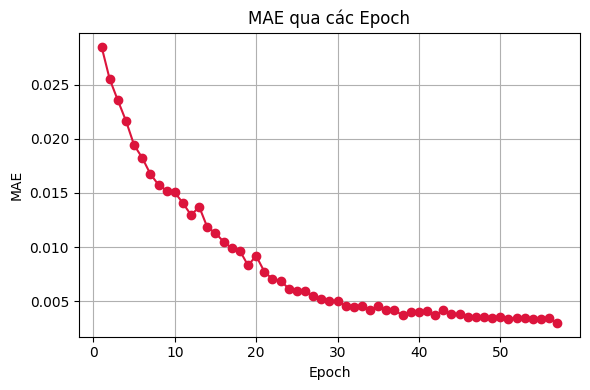

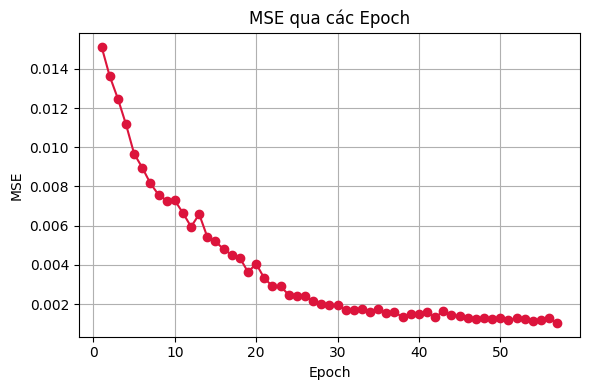

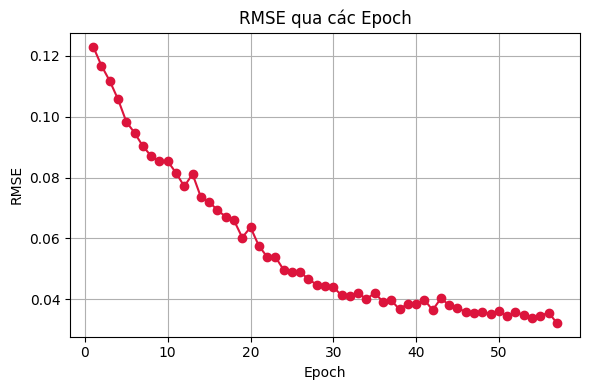

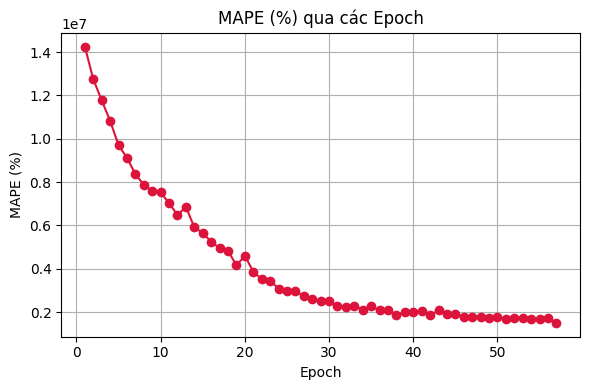

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Kiểm tra trước khi lấy giá trị từ history để tránh lỗi KeyError
available_metrics = history.history.keys()
print("Các metric có sẵn trong history:", available_metrics)

# Nếu cần, có thể in ra để kiểm tra thủ công: print(history.history)

# Lấy các metric từ history nếu tồn tại
mae_history = history.history.get('mae') or history.history.get('mean_absolute_error')
mse_history = history.history.get('mse') or history.history.get('mean_squared_error')
mape_history = history.history.get('mape') or history.history.get('mean_absolute_percentage_error')

# Kiểm tra và chuyển đổi
if mse_history is not None:
    rmse_history = np.sqrt(mse_history)
else:
    rmse_history = None

epochs = range(1, len(mae_history) + 1 if mae_history else 1)

# Hàm vẽ biểu đồ
def plot_metric(metric_values, metric_name):
    if metric_values is not None:
        plt.figure(figsize=(6, 4))
        plt.plot(epochs, metric_values, marker='o', color='crimson')
        plt.title(f'{metric_name} qua các Epoch')
        plt.xlabel('Epoch')
        plt.ylabel(metric_name)
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        print(f"[!] Không tìm thấy dữ liệu cho {metric_name}")

# Vẽ từng biểu đồ
plot_metric(mae_history, 'MAE')
plot_metric(mse_history, 'MSE')
plot_metric(rmse_history, 'RMSE')
plot_metric(mape_history, 'MAPE (%)')


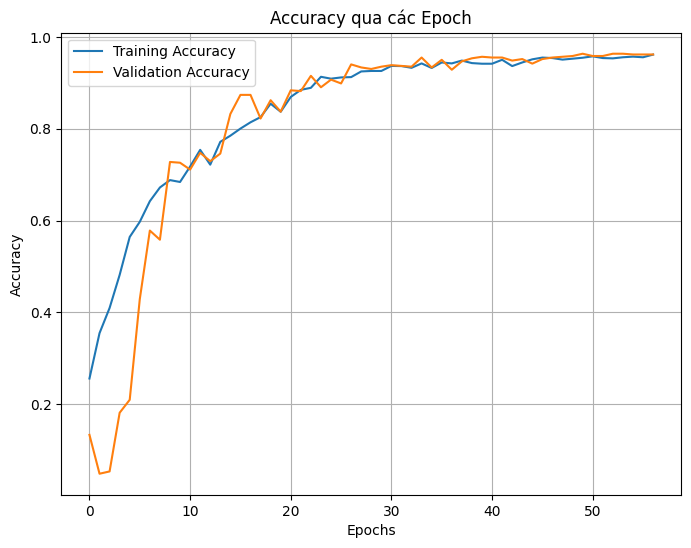

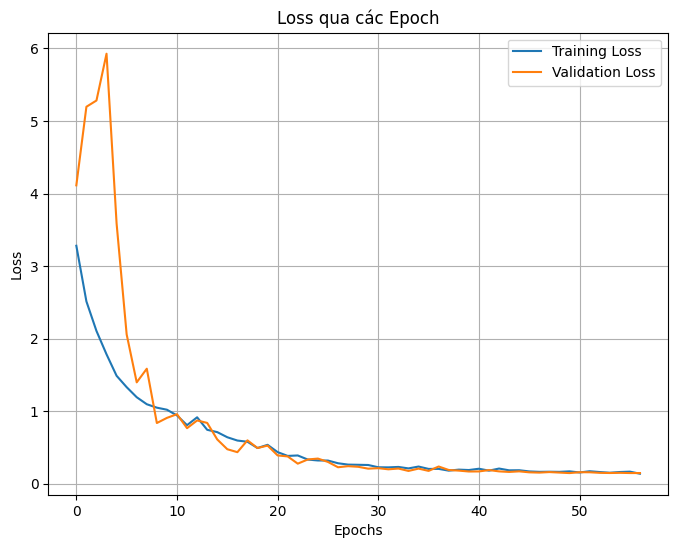

Accuracy cuối cùng trên tập huấn luyện: 96.16%
Accuracy cuối cùng trên tập kiểm tra: 96.18%
Loss cuối cùng trên tập huấn luyện: 0.1387
Loss cuối cùng trên tập kiểm tra: 0.1479


In [5]:
import matplotlib.pyplot as plt

def plot_accuracy(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy qua các Epoch')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_loss(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss qua các Epoch')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# In ra accuracy và loss cuối cùng của tập train và test
def print_final_metrics(history):
    final_train_acc = history.history['accuracy'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    final_train_loss = history.history['loss'][-1]
    final_val_loss = history.history['val_loss'][-1]
    
    print(f"Accuracy cuối cùng trên tập huấn luyện: {final_train_acc*100:.2f}%")
    print(f"Accuracy cuối cùng trên tập kiểm tra: {final_val_acc*100:.2f}%")
    print(f"Loss cuối cùng trên tập huấn luyện: {final_train_loss:.4f}")
    print(f"Loss cuối cùng trên tập kiểm tra: {final_val_loss:.4f}")

# Gọi hàm để vẽ và in ra số liệu
plot_accuracy(history)
plot_loss(history)
print_final_metrics(history)
